<a href="https://colab.research.google.com/github/marimartignago/analise_exploratoria_dados/blob/main/Teste_Engenharia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cenário**

No seguinte cenário você é a pessoa engenheira de dados por trás do projeto de data ops junto a uma grande operadora de cartões de crédito.

Os dados a serem ingeridos e analisados em nossa plataforma de Big Data são dados de compras (trasacao), documentos (contrato) e dados de compradores (cliente).

**Entregáveis:**



1.     Consulta que retorne o ganho total da empresa por cliente;
2.    Código com pyspark que retorne o total liquido;
3. Resolução de problema de transformação de dados (NF-e);
4.  Arquitetura exemplo da ingestão anterior (ecossistema GCP);

  
  
    
   


# Entregável 1: 

In [ ]:
WITH ganho AS (
SELECT t1.contrato_id, cliente_id,
sum((t1.percentual*(t2.valor_total*(1-isnull(t2.percentual_desconto, 0)/100)))/100) as valor
FROM contrato AS t1


inner join transacao AS t2
ON(t1.contrato_id = t2.contrato_id)
WHERE t1.ativo = 'TRUE'
GROUP BY cliente_id, t1.contrato_id)



SELECT cliente.nome cliente_nome,
format(ganho.valor, '0.00') valor
FROM ganho
inner join cliente
ON(ganho.cliente_id=cliente.cliente_id)


*   criação do banco de dados no SQL Server.
*   a mesma query da imagem está contida no código acima.  

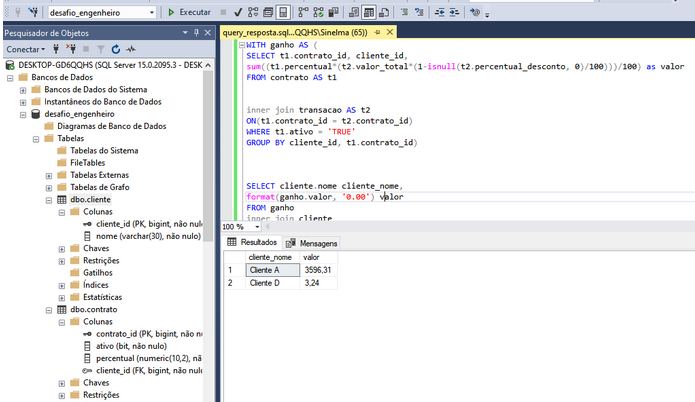

# Entregável 2: 

Para calcular o total líquido é necessário relacionar algumas tabelas:
- na tabela transação, a coluna transacao_id, que está relacionado às compras realizadas.
- na tabela contrato, saber quanto cada cliente gastou e ganhou de desconto.
chegar no total bruto a partir de todas as transições realizadas. 

# Entregável 3: 

In [30]:
import pandas as pd


In [31]:
#Criar uma lista de dicionário aninhado:

list = [
   {
      "CreateDate":"2021-05-24T20:21:34.79",
      "EmissionDate":"2021-05-24T00:00:00",
      "Discount":0.0,
      "NFeNumber":501,
      "NFeID":1,
      "ItemList":[
         {
            "ProductName":"Rice",
            "Value":35.55,
            "Quantity":2
         },
         {
            "ProductName":"Flour",
            "Value":11.55,
            "Quantity":5
         },
         {
            "ProductName":"Bean",
            "Value":27.15,
            "Quantity":7
         }
      ]
   },
   {
      "CreateDate":"2021-05-24T20:21:34.79",
      "EmissionDate":"2021-05-24T00:00:00",
      "Discount":0.0,
      "NFeNumber":502,
      "NFeID":2,
      "ItemList":[
         {
            "ProductName":"Tomate",
            "Value":12.25,
            "Quantity":10
         },
         {
            "ProductName":"Pasta",
            "Value":7.55,
            "Quantity":5
         }
      ]
   },
   {
      "CreateDate":"2021-05-24T20:21:34.79",
      "EmissionDate":"2021-05-24T00:00:00",
      "Discount":0.0,
      "NFeNumber":503,
      "NFeID":3,
      "ItemList":[
         {
            "ProductName":"Beer",
            "Value":9.00,
            "Quantity":6
         },
         {
            "ProductName":"French fries",
            "Value":10.99,
            "Quantity":2
         },
         {
            "ProductName":"Ice cream",
            "Value":27.15,
            "Quantity":1
         }
      ]
   }
]


In [ ]:
print(list)

[{'CreateDate': '2021-05-24T20:21:34.79', 'EmissionDate': '2021-05-24T00:00:00', 'Discount': 0.0, 'NFeNumber': 501, 'NFeID': 1, 'ItemList': [{'ProductName': 'Rice', 'Value': 35.55, 'Quantity': 2}, {'ProductName': 'Flour', 'Value': 11.55, 'Quantity': 5}, {'ProductName': 'Bean', 'Value': 27.15, 'Quantity': 7}]}, {'CreateDate': '2021-05-24T20:21:34.79', 'EmissionDate': '2021-05-24T00:00:00', 'Discount': 0.0, 'NFeNumber': 502, 'NFeID': 2, 'ItemList': [{'ProductName': 'Tomate', 'Value': 12.25, 'Quantity': 10}, {'ProductName': 'Pasta', 'Value': 7.55, 'Quantity': 5}]}, {'CreateDate': '2021-05-24T20:21:34.79', 'EmissionDate': '2021-05-24T00:00:00', 'Discount': 0.0, 'NFeNumber': 503, 'NFeID': 3, 'ItemList': [{'ProductName': 'Beer', 'Value': 9.0, 'Quantity': 6}, {'ProductName': 'French fries', 'Value': 10.99, 'Quantity': 2}, {'ProductName': 'Ice cream', 'Value': 27.15, 'Quantity': 1}]}]


In [ ]:
#Adicionar valores de dict nas linhas:

rows = []
for data in list:
    data_row = data['ItemList']
    
      
    for row in data_row:
       
        rows.append(row)
  

  
print(df)

    ProductName  Value  Quantity
0          Rice  35.55         2
1         Flour  11.55         5
2          Bean  27.15         7
3        Tomate  12.25        10
4         Pasta   7.55         5
5          Beer   9.00         6
6  French fries  10.99         2
7     Ice cream  27.15         1


# Entregável 4: 

**Arquitetura de ingestão de dados de uma API**


- Enviar os arquivos para o Cloud Storage e estabelecer uma conexão com a Big Query;
- do Cloud Storage, processar os dados via Dataflow;
- carregar e exportar os dados para a Big Query;
- Os pipelines poder ser orquestrados pelo Cloud Composer.
- Recomenda-se o uso do Dataflow quando há realização de mesclagem de dados em massa.
- Também é recomendável limpar e transformar os dados conforme forem sendo carregados para a Big Query, ao inves de armazenar tudo e depois mesclar. A deve Big Query armazaenar os dados mesclados e transformados.
- Os jobs do Dataflow exigem um bucket na Cloud Storage para organizar os arquivos usados na execução do pipeline.
- Depois de executar o job no DataFlow, é possível acompanhar o status dos jobs na página do Dataflow.

Itens que poderiam ser usados durante o processo:

- Cloud Shell: executa comandos para criação e implementação
- Terraform: para criar a estrutura na cloud. Exemplo de uso: ao fazer a parte do setup da fundação de um projeto, está incluso IAM para autorizações e acessos e a hierarquia dos recursos na nuvem.
- Cloud Pub/Sub: para recebimento de mensagens
- Dataflow: plataforma de processamento
- Big Query: explorar os dados que foram processados.
- DataStudio: visualizar os dados armazenados.


Com relação à arquitetura orientada à mensagens, alguns questionamentos importantes:

- o pipeline terá um código compatível com processamentos batch e straming ou precisará ser refatorado?
- já existem tamplates ou soluções que podem servir de referência?


Caso implemente-se pipelines com processamento streaming na cloud com Dataflow, deve-se considerar também: 

- manutenção constante
- como monitorar os pipelines
- como permitir acesso específico a determinados serviços/pessoas

Entretanto, as vantagens do Dataflow são: automação, manutenção, monitoramento e escalabilidade. 

Um outro exemplo de arquitetura usando também Dataflow é: 

Apache Beam → Dataflow → BigQuery

Neste modelo, o processamento de dados pode ser batch e streaming, é possível realizar agendamentos (work scheduler), auto escalável.